# Analiza podatkov o hišah
Sedaj bom pridobljene podatke analizirala in poskusila odgovoriti in postavljena vprašanja

In [77]:
import pandas as pd
import numpy as np


In [186]:
hise = pd.read_csv("hise.csv")

## Leto gradnje ali leto adaptacije
Pri analizi podatkov pridem do problema, ko ne vem katero leto je bolje uporabiti. Nekatere hiše imajo podano le leto gradnje, spet druge le leto adaptacije, pri nekaterih pa imam podana oba podatka. Podatka nista enaka, zato tega ne morem kar zanemariti.

Zato bom dodala dodaten stolpec, kjer bom pri hišah s podanim letom adaptacije in letom gradnje vzela mlajšo letnico (leto adaptacije), pri tistih ki pa imajo le leto adaptacije pa kar to leto. S tem sicer zanemarim nekaj razlik med hišami, pa vendar sklepam, da je adaptacija bila dovolj dobra in to ne bi smelo biti ključnega pomena.

Za lažjo primerjavo sem dodala tudi ceno na kvadratni meter.

In [187]:
hise["leto"] = hise[["leto_gradnje", "leto_adaptacije"]].values.max(1)
hise["cena_m2"] = hise.cena / hise.povrsina
hise

,id,cena,regija,upravna,obcina,leto_gradnje,leto_adaptacije,povrsina,gradnja,leto,cena_m2
0,6467192,480000.0,LJ-mesto,Lj. Moste-Polje,Ljubljana,2022,0,187.99,samostojna,2022,2553.327305
1,6387983,275000.0,Gorenjska,Radovljica,Bled,1800,1950,400.00,samostojna,1950,687.500000
2,6462270,180000.0,Gorenjska,Radovljica,Bohinj,1892,1950,188.70,vrstna,1950,953.895072
3,6506148,680000.0,LJ-mesto,Lj. Šiška,Ljubljana,1975,0,385.00,samostojna,1975,1766.233766
4,6475865,239800.0,Savinjska,Celje,Celje,2022,0,139.40,dvojček,2022,1720.229555
...,...,...,...,...,...,...,...,...,...,...,...
3234,6489255,214900.0,LJ-okolica,Domžale,Domžale,1986,0,110.00,samostojna,1986,1953.636364
3235,6475309,230000.0,Posavska,Brežice,Brežice,1900,2008,539.06,samostojna,2008,426.668645
3236,6475636,142000.0,Gorenjska,Škofja Loka,Železniki,2021,0,235.00,vrstna,2021,604.255319
3237,6495022,138000.0,Gorenjska,Škofja Loka,Železniki,1980,0,270.00,samostojna,1980,511.111111


### Ali vpliva leto izgradnje na ceno?
Glede na to da sem v zgornjem odseku zanemarila razliko med letom gradnje in adaptacije, bom preverila, če obstaja razlika v ceni med hišami, ki so bile grajene prej in nato adaptirane, ter pa med tistimi, ki so bile zgrajena istega leta adaptacije.

In [326]:
hise["zaokrozeno_leto_adaptacije"] = 10 * (hise.leto_adaptacije // 10)
hise_adaptacija = hise[hise.zaokrozeno_leto_adaptacije >= 1900].groupby("zaokrozeno_leto_adaptacije")["cena_m2"].mean().to_frame("Gradnja in adaptacija")
hise["zaokrozeno_leto_gradnje"] = 10 * (hise.leto_gradnje // 10)
hise_gradnja = hise[(hise.leto_adaptacije == 0) & (hise.zaokrozeno_leto_gradnje >= 1900)].groupby("zaokrozeno_leto_gradnje")["cena_m2"].mean().to_frame("Gradnja")
df = pd.concat([hise_adaptacija, hise_gradnja], axis = 1)
df.sort_index()

,Gradnja in adaptacija,Gradnja
1900,904.829352,1635.227949
1910,NaN,1179.112554
1920,NaN,1499.836829
1930,975.609756,1152.693606
1940,519.923994,2130.045029
1950,1226.038976,1785.284665
1960,1061.087093,1620.025214
1970,1264.992147,1562.188363
1980,1583.771360,1285.430479
1990,1755.526696,1653.280595


<AxesSubplot: >

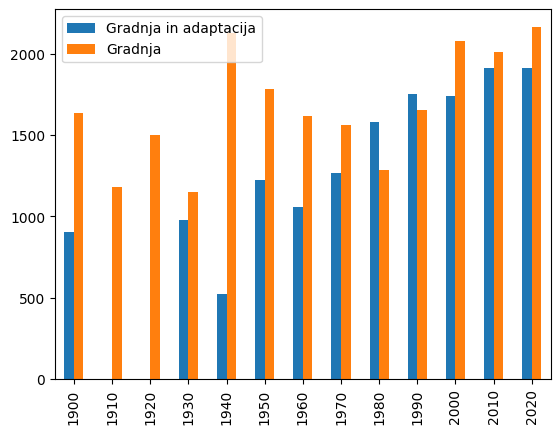

In [327]:
df.sort_index().plot.bar()

V zgodnejših letih je razlika v ceni velika, predvsem v letih med 1840 in 1950, kjer imajo hiše ki so bile grajene preij in v teh letih le adaptirane kar 4x manjšo povprečno ceno. Nato se zgodi preobrat med leti 1980 in 2000 kjer so adaptirane hiše presentljivo celo nekoliko dražje. Od 2000 naprej pa cene novogradnje v primerjavi z adaptiranimi ne odstopajo več toliko kot cene prve polovice 19. stoletja.
Ugotavljam da bom pri posplošitvi leta gradnje pri podatkih do leta 1950 s tem povzročila več netočnosti, medtem ko v kasnejših letih to ne bo povzročilo toliko odstopanj. 

<AxesSubplot: xlabel='zaookrozeno_leto'>

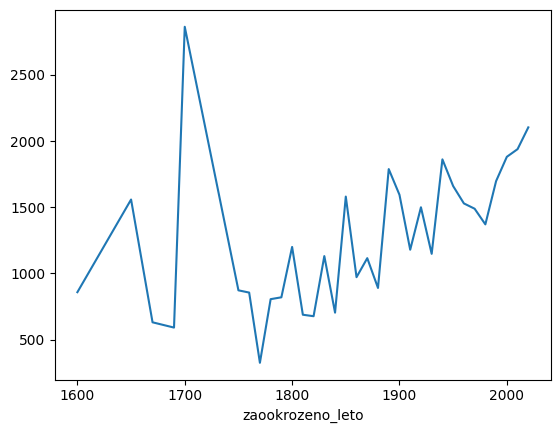

In [335]:
hise["zaookrozeno_leto"] = 10 * (hise.leto // 10)
hise[(hise.leto != 0) & (hise.leto >= 1600)].groupby("zaookrozeno_leto")["cena_m2"].mean().plot()

In [340]:
hise[hise.zaookrozeno_leto == 1700].sort_values("cena_m2", ascending=False)

,id,cena,regija,upravna,obcina,leto_gradnje,leto_adaptacije,povrsina,gradnja,leto,cena_m2,zaokrozeno_leto_adaptacije,zaokrozeno_leto_gradnje,zaookrozeno_leto
2349,6515490,420000.0,J. Primorska,Piran,Piran,1700,0,53.4,samostojna,1700,7865.168539,0,1700,1700
164,6201264,2800000.0,Gorenjska,Radovljica,Bled,1700,0,680.0,samostojna,1700,4117.647059,0,1700,1700
1893,6468404,140000.0,J. Primorska,Koper,Koper,1700,0,75.0,samostojna,1700,1866.666667,0,1700,1700
1580,6515735,550000.0,Podravska,Maribor,Maribor,1700,0,300.0,samostojna,1700,1833.333333,0,1700,1700
1215,6514933,68000.0,LJ-okolica,"Lj. J&Z del (Vič, Rudnik)",Velike Lašče,1700,0,80.0,samostojna,1700,850.000000,0,1700,1700
2872,6448068,60000.0,Savinjska,Laško,Laško,1707,0,92.7,samostojna,1707,647.249191,0,1700,1700


Gledam le hiše grajene po leto 1600, saj je za leta pred tem hiš zelo malo in tej podatki niso zanesljivi. Cena za hiše glede na leto gradnje narašča, kar je pričakovano. Veliko odstopanje je v letih okoli 1700, zato sem to pobližje pogledala. To povroča neka hiša iz Pirana, katere cena na kvadratni meter je kar 7865. Pri tem lahko da je prišlo tudi do kakšne napake pri pobiranju podatkov s spleta. 
Cene ne rastejo enmakomerno, do tega lahko da je prišlo ker nisem opredelila vhodnih parametrov kakšne hiše gledam (tj. hiše z bazeni, mestne hiše, podeželske hiše itd.)

## Število hiš po regijah in razlikovanje med cenami

In [200]:
stevilo_his = hise.groupby("regija").size().to_frame("količina")
cene_his = hise.groupby("regija")["cena_m2"].mean()
df = pd.concat([stevilo_his, cene_his], axis=1)
df

,količina,cena_m2
regija,,
Dolenjska,194,918.090188
Gorenjska,276,2025.963303
J. Primorska,427,2868.554190
Koroška,48,875.717362
LJ-mesto,405,2897.324820
LJ-okolica,534,2034.190729
Notranjska,58,754.392775
Podravska,487,1215.427329
Pomurska,137,745.923459


<AxesSubplot: ylabel='regija'>

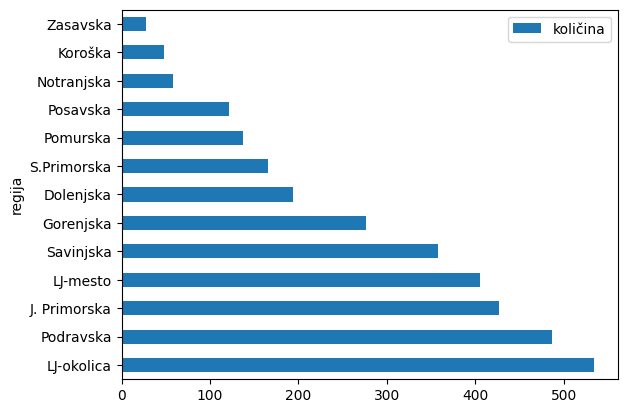

In [205]:
stevilo_his.sort_values("količina", ascending=False).plot.barh()

Največ oglasov za hiše je kot pričakovano v Ljubljani in njeni okolici. Najprej se morda zdi kot da v Ljubljani ni toliko hiš, a pri tem moramo upoštevati, da so ostale regije veliko večje in zato primerjava z Ljubljano ni popolnoma enakovredna. Nato v številu hiš prevladujeta Podravska in Južna Primorska. Tudi to ni presenetljivo, saj je obala zelo poseljeno območje, prav tako podravska regija. 

<AxesSubplot: xlabel='regija'>

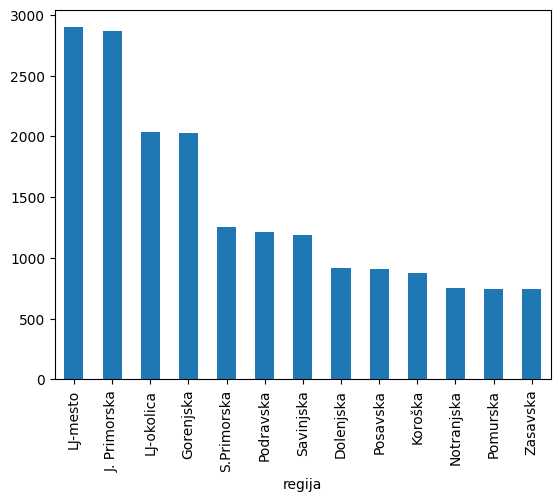

In [216]:
cene_his.sort_values(ascending=False).plot.bar()

Tudi pri cenah dobimo pričakovane rezultate. Hiše v Ljubljani in Južni Primorski so kar odstopajo v ceni, presenetljivo pa je da so tudi na Gorenjskem hiše kar drage. Najcenejše so v Notranjski, Pomurski in Zasavski regiji. 

<AxesSubplot: >

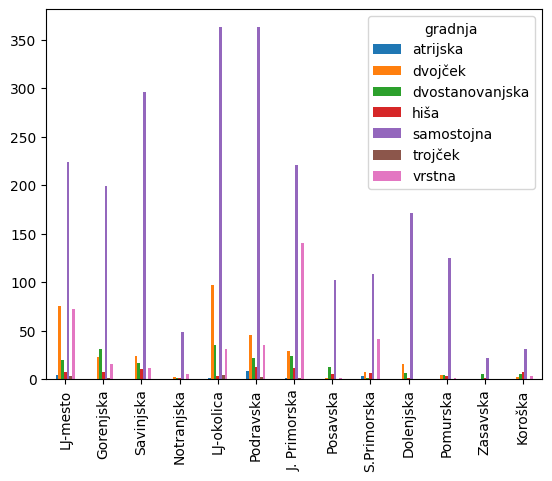

In [231]:
podatki = []
for reg in hise["regija"].unique():
    podatki_regija = hise[hise.regija == reg].groupby("gradnja").size().to_frame(reg)
    podatki.append(podatki_regija)
df = pd.concat(podatki, axis=1).T
df.plot.bar()

Vsepovsod prevladuje samostojna gradnja, v LJubljani in okolici imamo več dvojčkov, v količini vrstnih hiš pa prevladuje Južna primorska. Sklepam da je to zaradi burje, saj z gradnjo vrstnih hiš lahko manjšajo njen vpliv. Atrijskih hiš je sicer zelo malo, a presenetljivo je da jih lahko najdemo tudi v Ljubljani, saj so to so hiše, ki so običajno pritlične ter imajo velike vrtove. 

<AxesSubplot: >

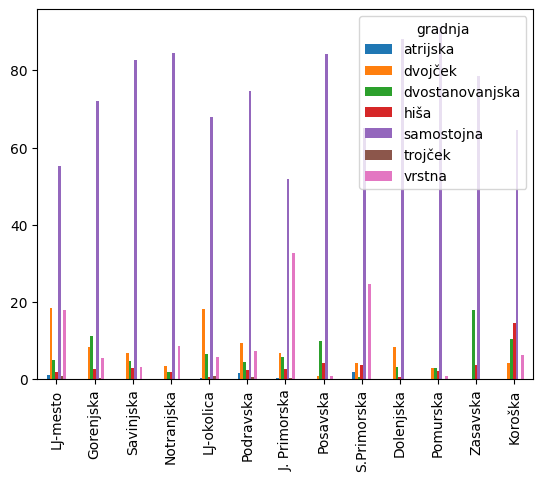

In [290]:
podatki = []
for reg in hise["regija"].unique():
    podatki_regija = hise[hise.regija == reg].groupby("gradnja").size().to_frame(reg + "_")
    stevilo_vseh_his = hise[hise.regija == reg].count()["id"]
    reg2 = reg + "_"
    podatki_regija[reg] = (podatki_regija[reg2] / stevilo_vseh_his) * 100
    podatki.append(podatki_regija[reg])
df = pd.concat(podatki, axis=1).T
df.plot.bar()

### Prodaja hiš po Ljubljani in razlikovanje v cenah
Zaradi velikega odstopanja Ljubljane v primerjavi  ostalimi regijami, sem se odločila pobližje pogledati oglase za hiše v Ljubljani.

In [217]:
hise_ljubljana = hise[hise.obcina == "Ljubljana"]

<AxesSubplot: xlabel='upravna'>

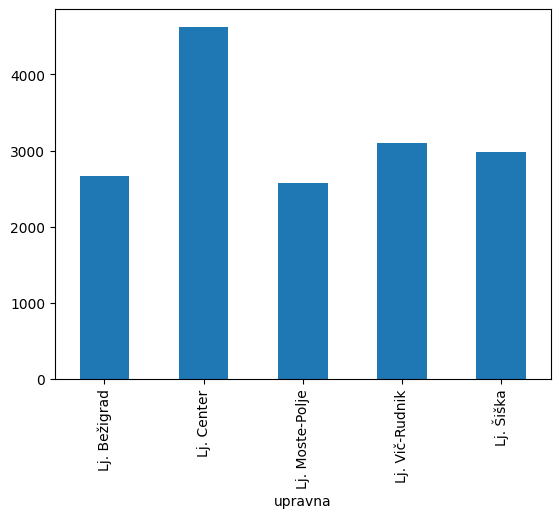

In [220]:
hise_ljubljana.groupby("upravna")["cena_m2"].mean().plot.bar()

/var/folders/m9/c7_qtjk12y1g1w2szgwskc0h0000gn/T/ipykernel_95816/753141741.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stevilo_vseh_his = hise_ljubljana[hise.upravna == uprava].count()["id"]
/var/folders/m9/c7_qtjk12y1g1w2szgwskc0h0000gn/T/ipykernel_95816/753141741.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stevilo_vseh_his = hise_ljubljana[hise.upravna == uprava].count()["id"]
/var/folders/m9/c7_qtjk12y1g1w2szgwskc0h0000gn/T/ipykernel_95816/753141741.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stevilo_vseh_his = hise_ljubljana[hise.upravna == uprava].count()["id"]
/var/folders/m9/c7_qtjk12y1g1w2szgwskc0h0000gn/T/ipykernel_95816/753141741.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stevilo_vseh_his = hise_ljubljana[hise.upravna == uprava].count()["id"]
/var/folders/m9/c7_qtjk12y1g1w2szgwskc0h0000gn/T/ipykernel_95816/753141741.p

<AxesSubplot: >

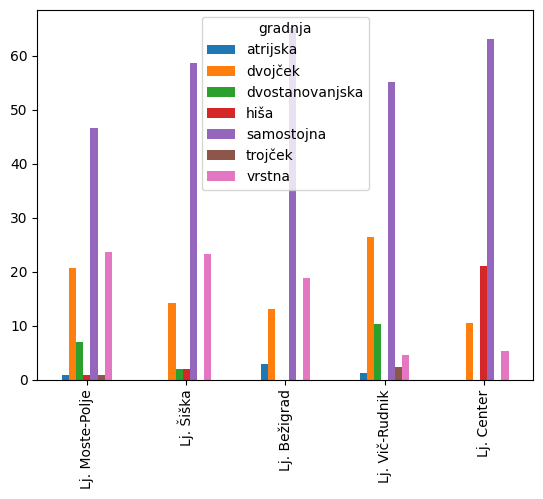

In [292]:
podatki2 = []
for uprava in hise_ljubljana["upravna"].unique():
    podatki_uprava = hise[hise.upravna == uprava].groupby("gradnja").size().to_frame(uprava + "_")
    stevilo_vseh_his = hise_ljubljana[hise.upravna == uprava].count()["id"]
    uprava2 = uprava + "_"
    podatki_uprava[uprava] = (podatki_uprava[uprava2] / stevilo_vseh_his) * 100
    podatki2.append(podatki_uprava[uprava])
df = pd.concat(podatki2, axis=1).T
df.plot.bar()

Tudi tu v vseh upravnih enotah prevladuje gradnja samostojnih hiš, v centru LJubljane je na prodaj veliko hiš, a katere podatek o načinu gradnje ni bil podan. Presentljivo v centru ni na prodaj veliko vrstnih hiš, četudi vemo da je teh tam veliko. Na Bežigradu imamo največ atrijskih hiš, a vseeno dokaj majhen procent. Slednja in Moste sta tudi edini lokaciji ki ponujata nakup hiše trojčka. 

## Trendi grajenja hiš glede na leta

<AxesSubplot: xlabel='zaookrozeno_leto'>

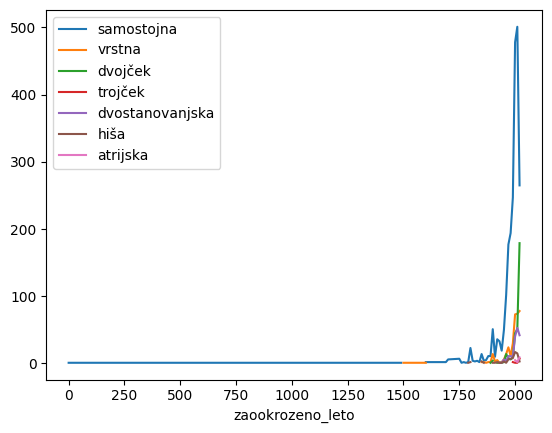

In [324]:
skupaj = []
for grad in hise["gradnja"].unique():
    grad = hise[hise["gradnja"] == grad].groupby("zaookrozeno_leto").size().to_frame(grad)
    skupaj.append(grad)
hise_po_gradbi = pd.concat(skupaj, axis=1)
hise_po_gradbi.sort_index().plot()

<AxesSubplot: xlabel='zaookrozeno_leto'>

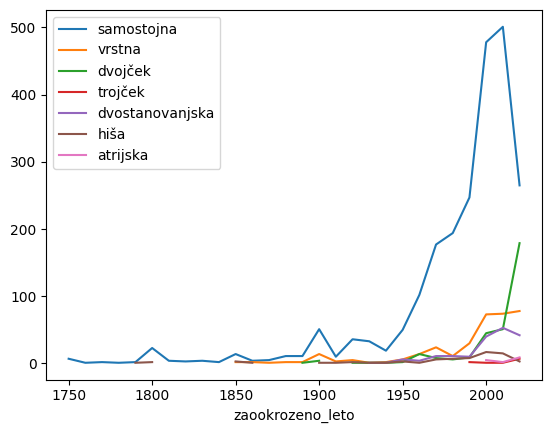

In [323]:
hise_po_gradbi[hise_po_gradbi.index > 1700].sort_index().plot()

Pri opaovanju načina gradnje glede na leto izgradnje, lahko opazimo da je za prodajne hiše izpred leta 1750 prevladovala zgolj samostojna gradnja, ato sem nato narisala še en graf za gradnjo po letu 1700. Tu lahko opaimo da je prodaja 